## support vector Classifier -SVCs

In [1]:
# importing necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report

In [2]:
# load the dataset
data =pd.read_csv('waste management.csv')
data.head()

,waste_type,material_composition,recycling_potential,toxicity_level,management_strategy
0,3,0.198716,0.016588,81.011339,0
1,1,0.005522,0.512093,86.707232,0
2,3,0.815461,0.226496,91.324055,0
3,3,0.706857,0.645173,51.134240,0
4,1,0.729007,0.174366,50.151629,0


In [3]:
# feature selection and Target selection
X = data.drop('management_strategy',axis=1)
y = data['management_strategy']

In [4]:
# train , test and split.
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8 , random_state=42)

In [5]:
# model and training
model = SVC(kernel='rbf',C=1.0,gamma='scale')
model.fit(X_train, y_train)

SVC()

In [6]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [7]:
# Accuracy score
acc = accuracy_score(y_test,y_pred)
print("Accuracy Score is ", acc)

Accuracy Score is  0.9


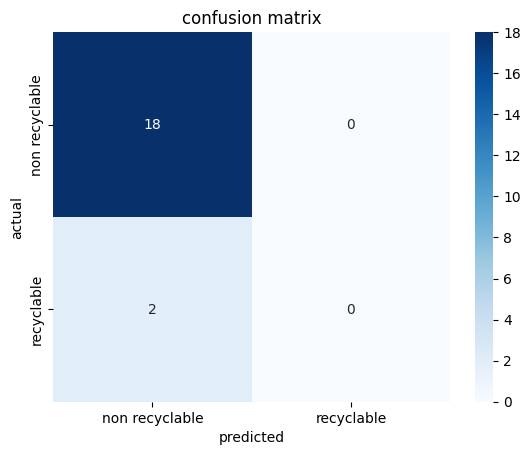

In [8]:
# confusion matrix
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm , annot=True, fmt='d' , cmap='Blues',
            xticklabels=['non recyclable','recyclable'],
            yticklabels=['non recyclable','recyclable'])
plt.title('confusion matrix')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

In [9]:
# classification report
print(classification_report(y_test,y_pred,target_names=['non recyclable','recyclable']))

                precision    recall  f1-score   support

non recyclable       0.90      1.00      0.95        18
    recyclable       0.00      0.00      0.00         2

      accuracy                           0.90        20
     macro avg       0.45      0.50      0.47        20
  weighted avg       0.81      0.90      0.85        20



C:\Users\singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [10]:
# model deployment
import joblib 
joblib.dump(model, 'svc_recyclability.pkl')

['svc_recyclability.pkl']